# Word Cloud comments from article_coment

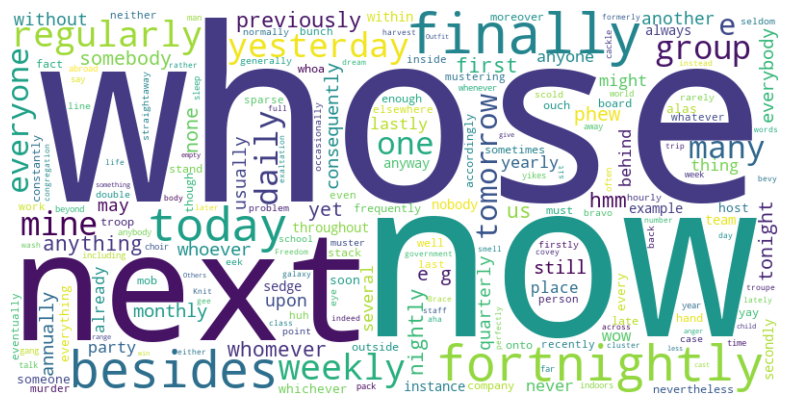

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_csv('data_warehouse/fact_videos_comment.csv')

all_comments = " ".join(df['comment'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Sentimen (negatif, netral or positif)


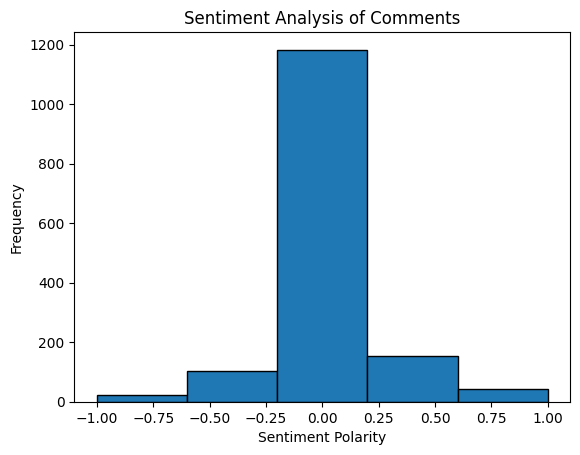

In [2]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

df = pd.read_csv('data_warehouse/fact_videos_comment.csv')

if 'comment' in df.columns:
    comments = df['comment'].dropna()

    sentiments = [TextBlob(comment).sentiment.polarity for comment in comments]

    plt.hist(sentiments, bins=5, edgecolor='black')
    plt.title('Sentiment Analysis of Comments')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Kolom 'comment' tidak ditemukan dalam file CSV.")